In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import importlib
# Set Jupyter theme
jtplot.style(theme='grade3', context='paper', ticks=True, grid=False)

# Configure inline figure format
%config InlineBackend.figure_format = 'retina'

# Update matplotlib font settings

plt.rcParams.update({'font.size': 12,  # Adjust font size as needed
                     "mathtext.fontset": 'cm',
                     "text.usetex": False,
                     "axes.labelcolor":  "gray",
                     "axes.edgecolor":  "gray",
                     "axes.spines.left":   True,  # display axis spines
                     "axes.spines.bottom": True,
                     "axes.spines.top":    False,
                     "axes.spines.right":  False,
                     "xtick.color":       "gray",
                     "ytick.color":     "gray",
                     "xtick.major.size":       0,
                     "ytick.major.size":     0,
                     "xtick.major.pad":       5,
                     "ytick.major.pad":     5,
                     "legend.fancybox":      True,
                     "legend.labelcolor":  "gray",
                     })  # Set font family for math text

# If you are reloading modules, you may need to use importlib.reload()
# importlib.reload(module_name)

In [2]:
import src.markovchain
src.markovchain = importlib.reload(src.markovchain)
import src.mrp
src.mrp = importlib.reload(src.mrp)
import src.mdp
src.mdp = importlib.reload(src.mdp)
import src.tiny_mdps
src.tiny_mdps = importlib.reload(src.tiny_mdps)
mdps = []
for mdp_no in [4]:
    mdp = src.tiny_mdps.load_example(mdp_no)
    mdps.append(mdp)
%matplotlib inline

In [3]:
initial_policy_list = ["zeros",  "boundary", "adversarial"]
initial_policy_labels_list = [ r'\text{center}',  r'\text{boundary}', r'\text{adversarial}']
T = 50
n_list = [1, 10, 50]
k_list = [1, 10, 50]
n_seeds = 1

In [4]:
from src import runner
# Reload the runner module if needed
runner = importlib.reload(runner)
# Initialize lists to store parameters, generators, and data
extragradient = []
for k in k_list:
    extragradient_k = []
    for n in n_list:
        sweep_params = {
            "seed": np.arange(n_seeds),
            "num_iter": [T],
            "k": [k],
            "n": [n],
            "policy_improvement_type": ["PMD(+extragradient)"],
        }
        extragradient_n = runner.batch_run_alg(mdps, "initial_policy", initial_policy_list, "optimization", sweep_params)
        extragradient_k.append(extragradient_n)
    extragradient.append(extragradient_k)

In [5]:
from src import runner
# Reload the runner module if needed
runner = importlib.reload(runner)
# Initialize lists to store parameters, generators, and data
pmd = []

for k in k_list:
    sweep_params = {
        "seed": np.arange(n_seeds),
        "num_iter": [T],
        "k": [k],
        "policy_improvement_type": ["PMD"],
    }
    pmd_k = runner.batch_run_alg(mdps, "initial_policy", initial_policy_list, "optimization", sweep_params)
    pmd.append(pmd_k)

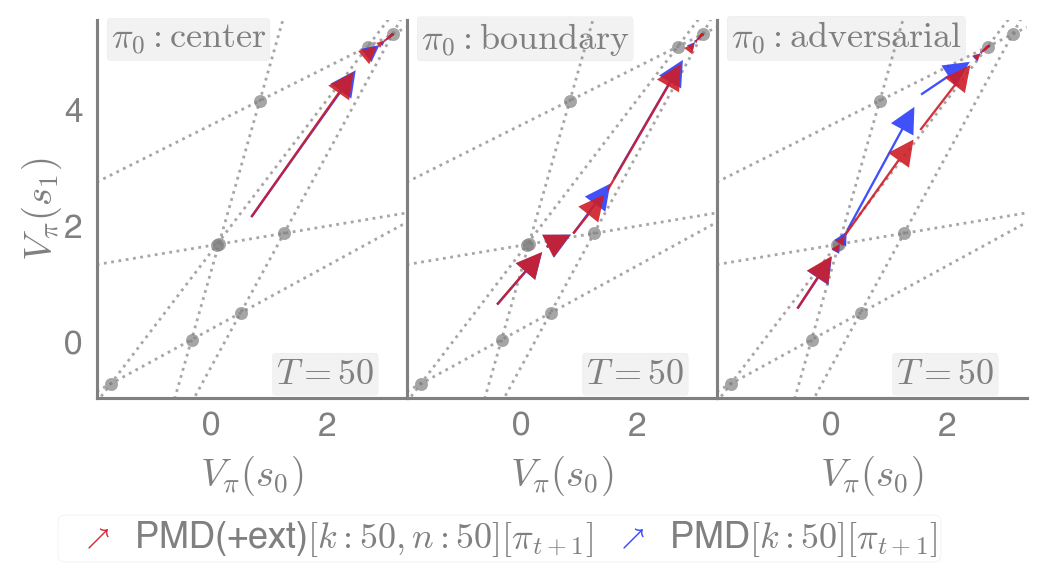

In [7]:
import src.plot_tiny_mdps
src.plot_tiny_mdps = importlib.reload(src.plot_tiny_mdps)
from src.plot_tiny_mdps import compare_vector_fields
import colormaps as cmaps

T_per_mdp = [[50, 50, 50]]
newcmap1 = cmaps.WhiteGreen.shift(0.25).cut(0.25, "right").cut(0.25, "left")
newcmap1_ = cmaps.WhiteGreen_r.shift(0.25).cut(0.25, "right").cut(0.25, "left")
newcmap2 = cmaps.cet_l_kbc_r.shift(0.25).cut(0.5, "right")
newcmap2_ = cmaps.cet_l_kbc.shift(0.25).cut(0.5, "right")
newcmap3 = cmaps.WhiteYellowOrangeRed.shift(0.25).cut(0.25, "right").cut(0.25, "left")
newcmap3_ = cmaps.WhiteYellowOrangeRed_r.shift(0.25).cut(0.25, "right").cut(0.25, "left")
# [newcmap1_, newcmap1],
cmaps_algs = [  [newcmap3_, newcmap3],[newcmap2_, newcmap2]]

for mdp_no, mdp in enumerate(mdps):
    if mdp_no == 0:
        data = []
        labels = []
        batch_param_kv_rows = []
        for i, initial_policy in enumerate(initial_policy_list):
            innerT = T_per_mdp[mdp_no][i]
            kk = 2
            k = 50
            nn = 2
            n = 50
            # for kk, k in enumerate(k_list):
            labels_inner = [f'PMD(+ext)$[k:{k},n:{n}]$',f"PMD$[k:{k}]$"]
            data_inner = [extragradient[kk][nn][2][mdp_no][i], pmd[kk][2][mdp_no][i]]
            batch_param_kv_rows.append(f"$\pi_0:{initial_policy_labels_list[i]}$")
            data.append(data_inner)
            labels.append(labels_inner)

        compare_vector_fields(mdp, batch_param_kv_rows=[batch_param_kv_rows],
                              data=[data],
                              labels=[labels],
                              T=innerT,
                              alpha=0.9,
                              savefig=True, ext=True, tp1=False,
                              cmaps=cmaps_algs,
                              legend_bbox=(0.3, -0.3),
                              labelsize=14, textsize=13,
                              legendsize=13,
                              ticklabelsize=12,
                              arrowsize=11, arrowscale=1.1, s=200,
                              text_pos=[3,20],
                              # legend_ncols=1,
                              figname=f"how__mdp4__pmd_ext_2")